In [67]:
import nltk
import csv
import re
import sys
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn

In [63]:
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#This reads CSV a given CSV and stores the data in a list
def read_csv(data_path):
    file_reader = csv.reader(open(data_path,"rt", errors="ignore",encoding="utf-8"), delimiter=',')
    sent_list = []
    label_list = []

    for row in file_reader:
        id = row[0]
        sent = row[1]
        sent_list.append((id,sent))
        label_list.append(row[2])
    return sent_list, label_list

In [4]:
class taggingParsing:

    def sentenceSplit(self, text):
        tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = tokenizer.tokenize(text)
        return sentences

    def taggingNLTK(self, text):
        tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = tokenizer.tokenize(text)
        for sent in sentences:
            text = word_tokenize(sent)
            tagged_sent = nltk.pos_tag(text)

In [5]:
def classify(sent_list):

    keywords = ["suggest","recommend","hopefully","go for","request","it would be nice","adding","should come with","should be able","could come with", "i need" , "we need","needs", "would like to","would love to","allow","add"]

    # Goldberg et al.
    pattern_strings = [r'.*would\slike.*if.*', r'.*i\swish.*', r'.*i\shope.*', r'.*i\swant.*', r'.*hopefully.*',
                       r".*if\sonly.*", r".*would\sbe\sbetter\sif.*", r".*should.*", r".*would\sthat.*",
                       r".*can't\sbelieve.*didn't.*", r".*don't\sbelieve.*didn't.*", r".*do\swant.*", r".*i\scan\shas.*"]
    compiled_patterns = []
    for patt in pattern_strings:
        compiled_patterns.append(re.compile(patt))


    label_list = []
    for sent in sent_list:
        tokenized_sent = word_tokenize(sent[1])
        tagged_sent = nltk.pos_tag(tokenized_sent)
        tags = [i[1] for i in tagged_sent]
        label = 0
        patt_matched = False
        for compiled_patt in compiled_patterns:
            joined_sent = " ".join(tokenized_sent)
            matches = compiled_patt.findall(joined_sent)
            if len(matches) > 0:
                patt_matched = True
        keyword_match = any(elem in keywords for elem in tokenized_sent)
        
        
        pos_match = any(elem in ['MD', 'VB'] for elem in tags)

    

        if patt_matched:
            label = 1
        elif keyword_match == True:
                label = 1
        elif pos_match == True:
                label = 1    
     

        label_list.append(label)



    return label_list


In [295]:
sent_list,label_list = read_csv('V1.4_Training.csv')
label_list = [int(label) for label in label_list]

In [6]:
predicted_label_list = classify(sent_list)

In [7]:
len(sent_list)

8500

In [8]:
len(predicted_label_list)

8500

In [9]:
count = 0
for i in range(len(sent_list)):
    if label_list[i] == predicted_label_list[i]:
        count+=1
print((float(count)/len(sent_list))*100)

53.400000000000006


In [10]:
count

4539

In [11]:
c1 = 0
c2 = 0
for i in range(len(label_list)):
    if label_list[i] == 0:
        c1+=1
    else:
        c2+=1

In [12]:
c1, c2

(6415, 2085)

In [6]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding='utf-8')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [7]:
model = loadGloveModel('glove.6B.50d.txt')

Loading Glove Model
Done. 400000  words loaded!


In [8]:
model['please']

array([-0.43396 ,  0.73992 ,  0.78403 , -0.41921 ,  0.47901 , -0.90307 ,
        0.13821 ,  0.6004  , -0.18415 , -0.62068 , -0.67484 ,  1.2673  ,
        0.52699 , -0.11892 ,  0.9452  ,  0.48304 , -0.49922 , -0.98791 ,
        0.97262 , -0.98219 ,  0.41451 ,  0.076195,  0.76523 ,  1.1183  ,
        1.1039  , -1.2832  , -1.0954  , -0.68419 ,  0.79478 , -1.112   ,
        1.8908  ,  0.79092 , -0.74726 ,  0.045625, -0.44904 , -0.26887 ,
        0.7335  , -1.1762  ,  0.20768 , -0.45872 ,  1.1217  ,  0.24514 ,
        0.39667 ,  0.28376 ,  0.40472 ,  0.6518  ,  0.25236 ,  0.048414,
        0.3273  ,  1.1465  ])

In [9]:
model['should']

array([ 0.35145  , -0.24155  ,  0.0054776, -0.43396  ,  0.498    ,
       -0.15624  ,  0.085152 ,  0.037574 , -0.08182  , -0.11312  ,
        0.30311  ,  0.71108  , -0.18012  , -0.14026  ,  0.72316  ,
        1.1194   ,  0.54095  , -0.44946  ,  0.64814  , -0.86225  ,
       -0.088763 , -0.055229 ,  0.49666  , -0.14049  ,  0.20234  ,
       -2.1223   , -0.061711 , -0.18884  ,  0.15737  , -0.52156  ,
        3.7028   ,  0.73726  , -1.0739   , -0.63594  , -0.18347  ,
       -0.46252  ,  0.36886  ,  0.19455  , -0.068823 , -0.32577  ,
       -0.46426  , -0.096529 ,  0.41884  ,  0.53723  , -0.065486 ,
        0.14923  , -0.48415  ,  0.46327  , -0.029425 ,  0.34362  ])

In [124]:
def get_features(sent_list, ):

    keywords = ["suggest","recommend","hopefully","go","request",
                "would","be", "nice","adding","should", "come","able",
                "could", "need","needs", "like",
                "love","allow","add", "wish", "hope", "want", "hopefully", "better", "believe",
                "if", "only", "didn't", "can", "can't"]

    # Goldberg et al.
    pattern_strings = [r'.*would\slike.*if.*', r'.*i\swish.*', r'.*i\shope.*', r'.*i\swant.*', r'.*hopefully.*',
                       r".*if\sonly.*", r".*would\sbe\sbetter\sif.*", r".*should.*", r".*would\sthat.*",
                       r".*can't\sbelieve.*didn't.*", r".*don't\sbelieve.*didn't.*", r".*do\swant.*", r".*i\scan\shas.*"]
    compiled_patterns = []
    for patt in pattern_strings:
        compiled_patterns.append(re.compile(patt))


    label_list = []
    features = []
    for sent in sent_list:
        sent_vector = np.zeros(shape=(50,))
        tokenized_sent = word_tokenize(sent[1])
        tagged_sent = nltk.pos_tag(tokenized_sent)
        tags = [i[1] for i in tagged_sent]
        label = 0
        patt_matched = False
        for compiled_patt in compiled_patterns:
            joined_sent = " ".join(tokenized_sent)
            matches = compiled_patt.findall(joined_sent)
            if len(matches) > 0:
                patt_matched = True
        keyword_match = any(elem in keywords for elem in tokenized_sent)
        for i in range(len(tokenized_sent)):
            elem = tokenized_sent[i]
            elem = elem.lower()
            tag = tagged_sent[i][1]
            if model.get(elem) is not None:
                if elem in keywords:
                    sent_vector+=0.8*model[elem]
                elif tag in ['MD', 'VB']:
                    sent_vector+=0.15*model[elem]
                else:
                    sent_vector+=0.05*model[elem]
        features.append(sent_vector)
    features = np.array(features)
    return features
        
#         for i in range(len(tokenized_sent)):
#             tag = tagged_sent[i][1]
#             if tag in ['MD', 'VB']:
                
            
#         pos_match = any(elem in ['MD', 'VB'] for elem in tags)

    

#         if patt_matched:
#             label = 1
#         elif keyword_match == True:
#                 label = 1
#         elif pos_match == True:
#                 label = 1    
     

#         label_list.append(label

In [125]:
sent_list,label_list = read_csv('V1.4_Training.csv')
features = get_features(sent_list)


In [12]:
# with open('features', 'wb') as file:
#     pickle.dump(features, file)

In [13]:
with open('features', 'rb') as file:
    features = pickle.load(file)

In [126]:
label_list = np.array([int(label) for label in label_list])

In [197]:
classifier = svm.SVC(C=20.0, kernel='rbf',degree=2).fit(features, label_list)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [211]:
predicted_labels = classifier.predict(features)
print('train accuracy: ', accuracy_score(label_list, predicted_labels))

train accuracy:  0.8688235294117647


In [199]:
c=0
for i in range(len(predicted_labels)):
    if predicted_labels[i] == label_list[i]:
        c+=1
print(c)

7385


In [200]:
len(predicted_labels)

8500

In [201]:
test_sent_list,test_label_list = read_csv('SubtaskA_Trial_Test_Labeled.csv')
test_sent_list = test_sent_list[1:]
test_label_list = test_label_list[1:]
test_label_list = np.array([int(label) for label in test_label_list])
test_features = get_features(test_sent_list)

In [202]:
predicted_labels_test= classifier.predict(test_features)

In [203]:
len(predicted_labels_test)

592

In [204]:
print(len(test_sent_list))
c=0
for i in range(len(predicted_labels_test)):
    if predicted_labels_test[i] == test_label_list[i]:
        c+=1
print(c)

592
425


In [205]:
c1 = 0
c2 = 0
for i in range(len(test_label_list)):
    if test_label_list[i] == 0:
        c1+=1
    else:
        c2+=1
print(c1, c2)

296 296


In [206]:
print(classification_report(test_label_list, predicted_labels_test, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       296
           1       0.83      0.55      0.66       296

   micro avg       0.72      0.72      0.72       592
   macro avg       0.75      0.72      0.71       592
weighted avg       0.75      0.72      0.71       592



In [207]:
cm = confusion_matrix(test_label_list, predicted_labels_test)

In [208]:
def plot_confusion_matrix(mat, labels):
    df_cm = pd.DataFrame(mat, index = labels,
                  columns = labels)
    plt.figure(figsize = (6,4))
    sn.heatmap(df_cm, annot=True)

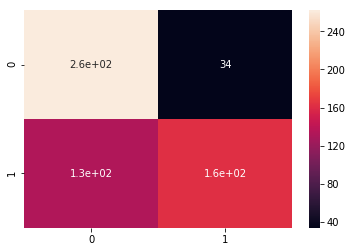

In [209]:
plot_confusion_matrix(cm, ['0','1'])

In [210]:
print('accuracy: ', accuracy_score(test_label_list, predicted_labels_test))

accuracy:  0.7179054054054054


In [237]:
weighted_classifier = svm.SVC(C=1.0, kernel='rbf',class_weight={1:3}).fit(features, label_list)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [234]:
predicted_labels = weighted_classifier.predict(features)
print('train accuracy: ', accuracy_score(label_list, predicted_labels))

train accuracy:  0.8044705882352942


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       296
           1       0.73      0.76      0.75       296

   micro avg       0.74      0.74      0.74       592
   macro avg       0.74      0.74      0.74       592
weighted avg       0.74      0.74      0.74       592



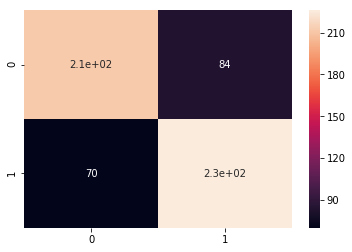

In [235]:
test_sent_list,test_label_list = read_csv('SubtaskA_Trial_Test_Labeled.csv')
test_sent_list = test_sent_list[1:]
test_label_list = test_label_list[1:]
test_label_list = np.array([int(label) for label in test_label_list])
test_features = get_features(test_sent_list)
predicted_labels_test= weighted_classifier.predict(test_features)
print(classification_report(test_label_list, predicted_labels_test, target_names=['0', '1']))
cm = confusion_matrix(test_label_list, predicted_labels_test)
plot_confusion_matrix(cm, ['0','1'])

print('accuracy: ', accuracy_score(test_label_list, predicted_labels_test))

## RNN LSTM IMPL

In [353]:
# sent_list,label_list

from string import punctuation

# get rid of punctuation
# reviews = reviews.lower() # lowercase, standardize
sent_list_1 = [sent[1].lower() for sent in sent_list]

for i in range(len(sent_list_1)):
    sent = sent_list_1[i]
    sent = ''.join([c for c in sent if c not in punctuation])
    sent_list_1[i] = sent
    
all_text = ' '.join(sent_list_1)

# all_text = ''.join([c for c in reviews if c not in punctuation])

# split by new lines and spaces
# reviews_split = all_text.split('\n')
# all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()

In [354]:
# feel free to use this import 
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
sent_ints = []
for sent in sent_list_1:
    sent_ints.append([vocab_to_int[word] for word in sent.split()])

In [355]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('Tokenized review: \n', sent_ints[:1])

Unique words:  10529

Tokenized review: 
 [[45, 353, 1093, 245, 94, 33, 1, 207, 219, 245, 820, 10, 100, 24, 20, 845, 420, 870, 4, 1906, 2669, 4, 20, 574, 13, 800, 2, 1, 54, 75, 8, 730, 283, 1046, 2, 165, 1, 2670, 283, 1046, 43, 6, 457]]


In [356]:
encoded_labels = label_list

In [357]:
# outlier review stats
sent_lens = Counter([len(x) for x in sent_ints])
print("Zero-length reviews: {}".format(sent_lens[0]))
print("Maximum review length: {}".format(max(sent_lens)))

Zero-length reviews: 13
Maximum review length: 343


In [358]:
# for ii, sent in enumerate(sent_ints):
#     if len(sent) == 0:
#         print('dvbd')
print(len(encoded_labels))

8500


In [359]:
print('Number of reviews before removing outliers: ', len(sent_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, sent in enumerate(sent_ints) if len(sent) != 0]
# remove 0-length reviews and their labels
sent_ints = [sent_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(sent_ints))

Number of reviews before removing outliers:  8500
Number of reviews after removing outliers:  8487


In [361]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)
    print(features.shape)
    
    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        val = np.array(row)[:seq_length]
#         print(val.shape)
        features[i, -len(row):] = np.array(row)[:seq_length]
        
    
    return features

In [363]:
# Test your implementation!

seq_length = 200

features = pad_features(sent_ints, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features[:30,:50])

(8487, 200)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [368]:
split_frac = 0.9

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

# test_idx = int(len(remaining_x)*0.5)
# val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
# val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

val_x = remaining_x
val_y = remaining_y

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape))

			Feature Shapes:
Train set: 		(7638, 200) 
Validation set: 	(849, 200)


In [370]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
# test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
# test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [371]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[   0,    0,    0,  ..., 1984,    1,   37],
        [   0,    0,    0,  ...,    1,  266,  292],
        [   0,    0,    0,  ...,  328,    1,  153],
        ...,
        [   0,    0,    0,  ..., 2232,    1,   14],
        [   0,    0,    0,  ...,   81,  953, 1037],
        [   0,    0,    0,  ...,    1,   14,  329]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1], dtype=torch.int32)


In [372]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [373]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [374]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(10530, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [375]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))